In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from optimizer.skopt_optimizer import SkoptOptimizer
from optimizer.botorch_optimizer import BoTorchOptimizer
from simulator import NearestNeighborSimulator
from utils.helpers import *

In [2]:
df = pd.read_csv("data/concrete_data.csv").dropna()
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_scaled = MinMaxScaler().fit_transform(X)

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075


In [4]:
simulator = NearestNeighborSimulator(X_scaled, y)

### 📌 Acquisition Functions in Bayesian Optimization

In Bayesian Optimization, the **acquisition function** decides where to sample next based on the surrogate model (e.g., a Gaussian Process). Different acquisition functions balance **exploration** (searching uncertain areas) and **exploitation** (focusing on promising areas):

- **EI (Expected Improvement)**  
  Prioritizes points expected to improve over the current best value.  
  🔁 *Good general-purpose choice, balances exploration and exploitation.*

- **PI (Probability of Improvement)**  
  Selects points most likely to beat the current best, without considering how much improvement occurs.  
  🎯 *Focused on exploitation; may converge quickly but risks missing better areas.*

- **LCB (Lower Confidence Bound)**  
  Chooses points using the formula:  
  \[
  \mu(x) - \kappa \cdot \sigma(x)
  \]  
  where \(\mu(x)\) is the predicted mean and \(\sigma(x)\) is the uncertainty.  
  🚀 *Encourages exploration by favoring uncertain regions; good for noisy or under-sampled problems.*

---

In the following analysis, we run the optimization with each acquisition function to observe their different behaviors and convergence patterns.


In [5]:
iterations = 10
batch_size = 3
dim = X_scaled.shape[1]

acq_funcs = ["EI", "PI", "LCB"]
traces = {}

for acq in acq_funcs:
    skopt_opt = SkoptOptimizer(
        dim=dim,
        batch_size=batch_size,
        acq_func=acq,
        acq_optimizer="auto",
        n_initial_points=5
    )
    trace = run_skopt(skopt_opt, simulator, iterations)
    traces[f"skopt-{acq}"] = trace

[skopt] Iter 1/10 - Best: 56.6191
[skopt] Iter 2/10 - Best: 73.2982
[skopt] Iter 3/10 - Best: 73.2982
[skopt] Iter 4/10 - Best: 73.2982
[skopt] Iter 5/10 - Best: 73.2982
[skopt] Iter 6/10 - Best: 73.2982
[skopt] Iter 7/10 - Best: 73.2982
[skopt] Iter 8/10 - Best: 73.2982
[skopt] Iter 9/10 - Best: 73.2982
[skopt] Iter 10/10 - Best: 73.2982
[skopt] Iter 1/10 - Best: 56.6191
[skopt] Iter 2/10 - Best: 73.2982


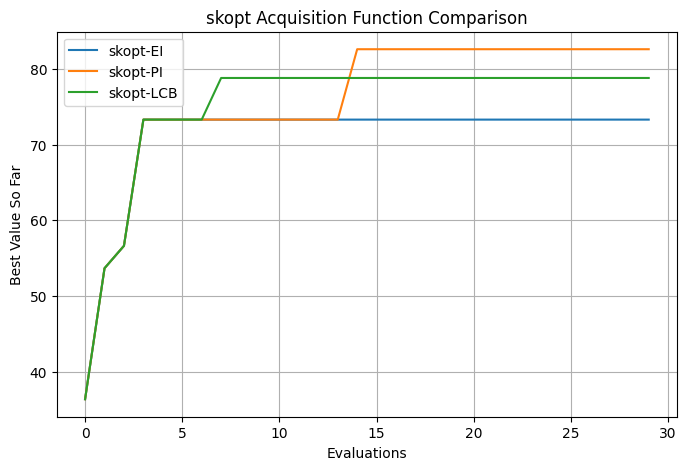

In [6]:
plot_trace(traces, title="skopt Acquisition Function Comparison")